In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Constant case

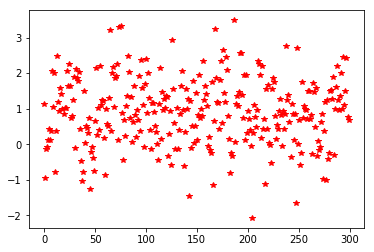

In [2]:
# Problem settings
C = 1 # constant to be estimated
Q = 1e-5 # variance of state noise
R = 1 # variance of measurement noise
N = 300 # number of measurements
z = C + np.random.normal(0,np.sqrt(R),size=N) # measurements


plt.plot(np.arange(N),z,'r*')

In [3]:
# Kalman filter settings
P0 = 1
x_hat_0 = 0
x0 = np.random.normal(x_hat_0,np.sqrt(P0))
x_hat_history = np.zeros((N+1,))
Q=1e-5



x_hat = x_hat_0
x_hat_history [0] = x_hat
P=P0
for t in range(N):
    P = P + Q
    K = P / (R+P)
    x_hat = x_hat + K*(z[t]-x_hat)
    P = P - K*P
    x_hat_history[t+1] = x_hat
    


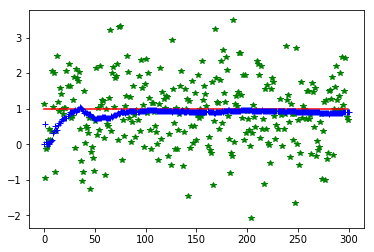

In [4]:
plt.plot(np.arange(N),z,'g*')
plt.plot(np.arange(N),C*np.ones((N,)),'r-')
plt.plot(np.arange(N+1),x_hat_history,'b+')

## Square signal

In [5]:
def kalman_filter (C_square,N_tot,R,Q):
    """
    Kalman filter for square signal
    C_square = vector with values of signal
    N_tot = number of measurements
    R = variance of noise of measurement
    Q = variance of signal
    """
    
    
    N_levels = len(C_square)
    N_pts_lev = int(np.floor(N_tot/N_levels))

    ##Construct measurements
    z=np.zeros((N_levels*N_pts_lev,))
    for i in range (N_levels):
        z[i*N_pts_lev:(i+1)*N_pts_lev] = C_square[i]+np.random.normal(0,np.sqrt(R),size=N_pts_lev)

    
    ## Kalman filter initialization
    P0 = 1
    x_hat_0 = 0
    x_hat_history = np.zeros((N_levels*N_pts_lev,))


    for k in range(N_levels):
        x_hat = x_hat_0
        P=P0
        for t in range(N_pts_lev):
            t = t + k*N_pts_lev
            P = P + Q
            K = P / (R+P)
            x_hat = x_hat + K*(z[t]-x_hat)
            P = P - K*P
            x_hat_history[t] = x_hat
            
            
    ## Plots        
    plt.plot(np.arange(z.shape[0]),z,'g*', label = "measurements")
    plt.plot(np.arange(N_levels*N_pts_lev),x_hat_history,'b+',label= "estimation")
    
    a=np.zeros(N_levels*N_pts_lev)
    for k in range(N_levels):
        a[k*N_pts_lev:(k+1)*N_pts_lev] = C_square[k]
    plt.plot(np.arange(N_levels*N_pts_lev),a,'r',label="true value")
    plt.legend()

Text(0.5,1,'Q=0.1')

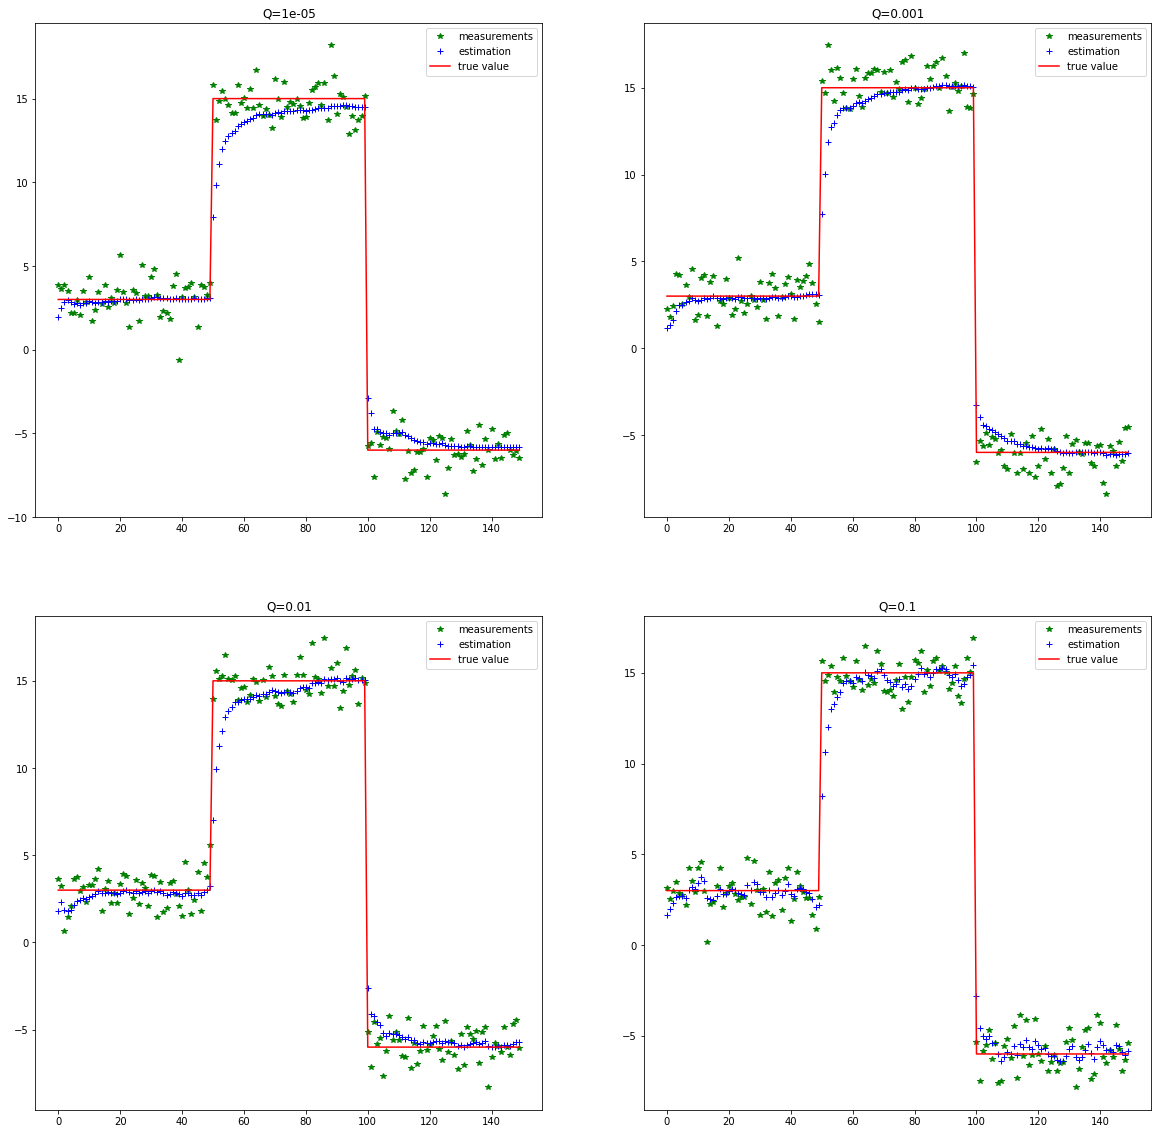

In [6]:
N_tot = 150
C_square = [3,15,-6]
R=1
plt.figure(figsize=(20,20))
Q=1e-5
plt.subplot(221)
kalman_filter(C_square,N_tot,R,Q)
plt.title("Q="+str(Q))


Q=1e-3
plt.subplot(222)
kalman_filter(C_square,N_tot,R,Q)
plt.title("Q="+str(Q))


Q=1e-2
plt.subplot(223)
kalman_filter(C_square,N_tot,R,Q)
plt.title("Q="+str(Q))


Q=1e-1
plt.subplot(224)
kalman_filter(C_square,N_tot,R,Q)
plt.title("Q="+str(Q))

When Q is large, the response time is smaller but there are more oscillations.